[*********************100%***********************]  1 of 1 completed
/var/folders/9b/tn7f95sx1jbf1kwpl44ny3mw0000gn/T/ipykernel_86973/383510453.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(data['Close'].iloc[i])


Buy on 2023-03-23 at $192.22
Sell on 2023-04-10 at $184.51
Buy on 2023-05-19 at $180.14
Sell on 2023-08-02 at $254.11
Buy on 2023-08-31 at $258.08
Sell on 2023-09-26 at $244.12
Buy on 2023-10-05 at $260.05
Sell on 2023-10-18 at $242.68
Buy on 2023-11-15 at $242.84
Sell on 2024-01-05 at $237.49
Buy on 2024-02-29 at $201.88
Sell on 2024-03-04 at $188.14
Buy on 2024-04-29 at $194.05
Sell on 2024-06-11 at $170.66
Buy on 2024-06-13 at $182.47
Sell on 2024-08-01 at $216.86
Buy on 2024-08-23 at $220.32
Sell on 2024-08-26 at $213.21
Buy on 2024-09-05 at $230.17
Sell on 2024-10-11 at $217.80
Buy on 2024-10-25 at $269.19
Sell on 2025-01-10 at $394.74
Buy on 2025-01-15 at $428.22
Sell on 2025-01-28 at $398.09

--- BACKTEST RESULTS ---
Initial Capital: $100000.00
Final Portfolio Value: $142137.10
Total Return: 42.14%


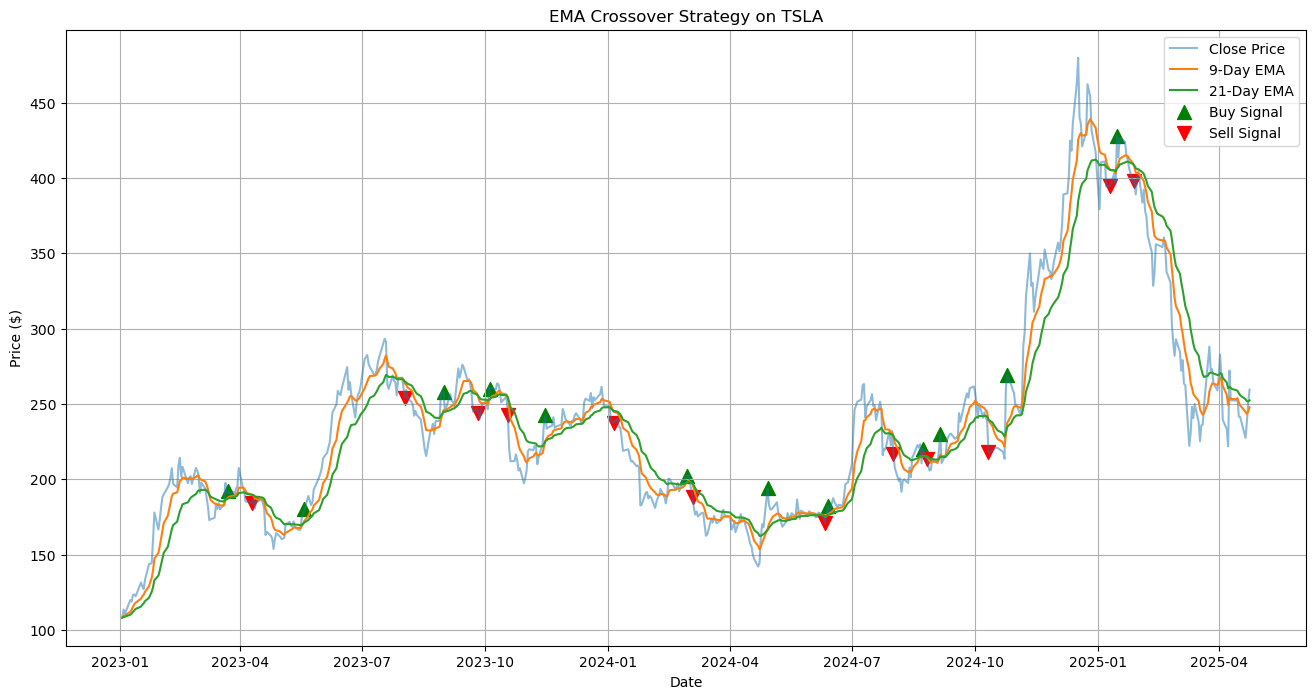

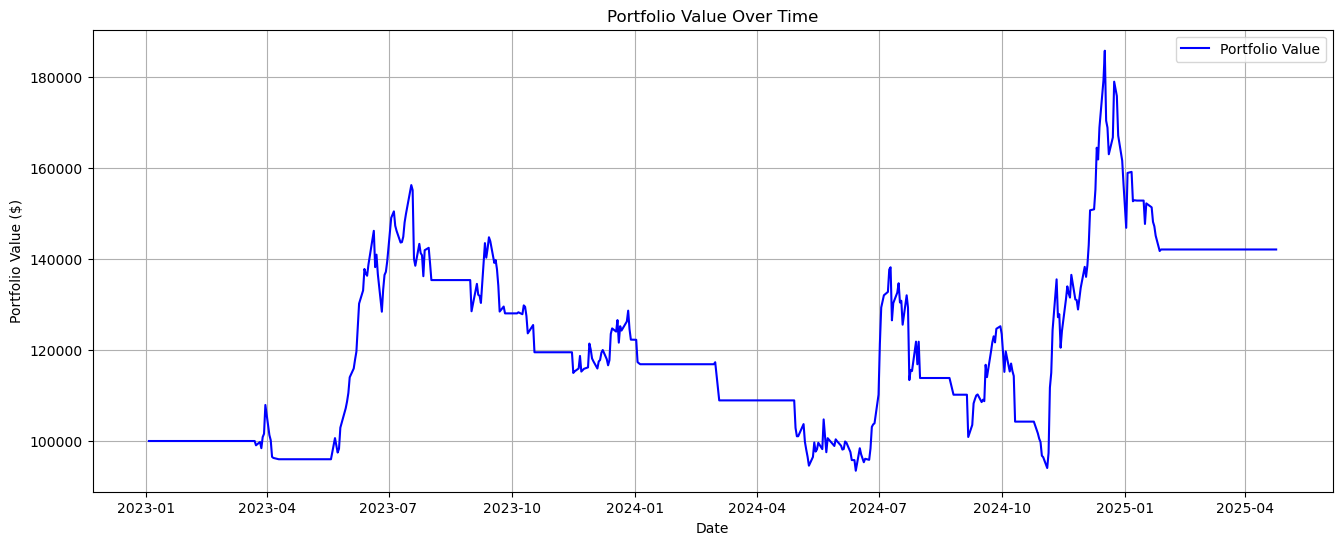

In [22]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# --- SETTINGS ---
ticker = "TSLA"
start_date = "2023-01-01"
end_date = "2025-04-25"
fast_ema = 9
slow_ema = 21
initial_capital = 100000

# --- FETCH DATA ---
data = yf.download(ticker, start=start_date, end=end_date)

# --- CALCULATE EMAs ---
data['EMA_Fast'] = data['Close'].ewm(span=fast_ema, adjust=False).mean()
data['EMA_Slow'] = data['Close'].ewm(span=slow_ema, adjust=False).mean()

# --- CREATE SIGNALS ---
data['Signal'] = 0
data.loc[data.index[fast_ema:], 'Signal'] = np.where(
    data['EMA_Fast'][fast_ema:] > data['EMA_Slow'][fast_ema:], 1, -1
)
data['Crossover'] = data['Signal'].diff()

# --- BACKTEST LOGIC ---
position = 0
cash = initial_capital
shares = 0
portfolio_value = []
buy_signals = []
sell_signals = []

for i in range(len(data)):
    price = float(data['Close'].iloc[i])
    date = data.index[i]

    if data['Crossover'].iloc[i] == 2:  # Bullish crossover (buy)
        if position == 0:
            shares = cash / price
            cash = 0
            position = 1
            buy_signals.append((date, price))
            print(f"Buy on {date.date()} at ${price:.2f}")

    elif data['Crossover'].iloc[i] == -2:  # Bearish crossover (sell)
        if position == 1:
            cash = shares * price
            shares = 0
            position = 0
            sell_signals.append((date, price))
            print(f"Sell on {date.date()} at ${price:.2f}")

    total_value = cash + shares * price
    portfolio_value.append(total_value)

# Save portfolio value
data['Portfolio_Value'] = portfolio_value

# --- FINAL RESULTS ---
final_value = portfolio_value[-1]
total_return = (final_value - initial_capital) / initial_capital * 100

print("\n--- BACKTEST RESULTS ---")
print(f"Initial Capital: ${initial_capital:.2f}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {total_return:.2f}%")

# --- PLOT EVERYTHING ---
plt.figure(figsize=(16,8))

# Plot Close Price
plt.plot(data.index, data['Close'], label='Close Price', alpha=0.5)

# Plot EMAs
plt.plot(data.index, data['EMA_Fast'], label=f'{fast_ema}-Day EMA', linewidth=1.5)
plt.plot(data.index, data['EMA_Slow'], label=f'{slow_ema}-Day EMA', linewidth=1.5)

# Plot Buy Signals
buy_dates, buy_prices = zip(*buy_signals) if buy_signals else ([], [])
plt.scatter(buy_dates, buy_prices, marker='^', color='green', s=100, label='Buy Signal')

# Plot Sell Signals
sell_dates, sell_prices = zip(*sell_signals) if sell_signals else ([], [])
plt.scatter(sell_dates, sell_prices, marker='v', color='red', s=100, label='Sell Signal')

# Decorations
plt.title(f'EMA Crossover Strategy on {ticker}')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

# --- PLOT PORTFOLIO VALUE SEPARATELY ---
plt.figure(figsize=(16,6))
plt.plot(data.index, data['Portfolio_Value'], label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.grid()
plt.legend()
plt.show()
